In [2]:
import numpy  as np
import pandas as pd

In [3]:
file = 'iris.data'
df = pd.read_csv(file)
print(df.shape)
print(df.head())

(149, 5)
   5.1  3.5  1.4  0.2  Iris-setosa
0  4.9  3.0  1.4  0.2  Iris-setosa
1  4.7  3.2  1.3  0.2  Iris-setosa
2  4.6  3.1  1.5  0.2  Iris-setosa
3  5.0  3.6  1.4  0.2  Iris-setosa
4  5.4  3.9  1.7  0.4  Iris-setosa


In [4]:
names = list(df.columns)

<AxesSubplot: >

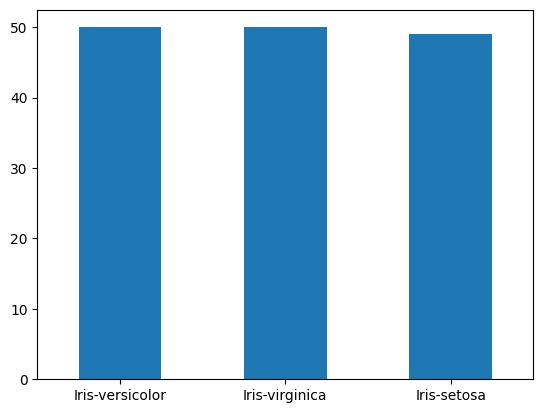

In [5]:
g = df[names[-1]].value_counts()
g.plot.bar(rot=0)

In [6]:
types = df.dtypes
types

5.1            float64
3.5            float64
1.4            float64
0.2            float64
Iris-setosa     object
dtype: object

In [7]:
data = df.values
data[:2]

array([[4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
       [4.7, 3.2, 1.3, 0.2, 'Iris-setosa']], dtype=object)

In [8]:
x = data [:,:-1]
y = data [:,-1]
x.shape,y.shape

((149, 4), (149,))

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)
x_scaled[0]

array([0.16666667, 0.41666667, 0.06779661, 0.04166667])

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_scaled, y, random_state = 42, test_size=0.25)

In [15]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
# Train the logistic regression model
lr = LogisticRegression()
lr.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = lr.predict(X_test)

# Compute the accuracy of the model
accuracy = lr.score(X_test, Y_test)
print("Accuracy:", accuracy)
print(classification_report(Y_test, Y_pred))

Accuracy: 0.868421052631579
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.88      0.64      0.74        11
 Iris-virginica       0.73      0.92      0.81        12

       accuracy                           0.87        38
      macro avg       0.87      0.85      0.85        38
   weighted avg       0.88      0.87      0.87        38



In [14]:
# Plot the decision boundary
x_min, x_max = X_test[:, 0].min() - .5, X_test[:, 0].max() + .5
y_min, y_max = X_test[:, 1].min() - .5, X_test[:, 1].max() + .5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = lr.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.show()

ValueError: X has 2 features, but LogisticRegression is expecting 4 features as input.